In [1]:
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

## Theoretical background

$\Psi_k = \frac{1}{\sqrt{N}} \sum_j e^{(j\,k\cdot r_j)} \, \phi_j = \frac{1}{\sqrt{N}} \sum_j c_k(r_j) \, \phi_j$

Notation:
$[\,]_{nm}$ = matrix of dimensions $n\times m$

- h = $[\phi_0]_{nn}$
- t = $[\phi_{+1}]_{mnn}, \ m=1$ for first nn hopping

For first nn:

- $c(k) = e^{(j\,k\cdot R)} \, ,k=(0,0,0)...(2\pi,0,0) \, , R=(1,0,0) $ 

- $[h(k)]_{nn} = [h]_{nn} + c(k) \cdot [t]_{0nn} + (c(k) \cdot [t]_{0nn})^H$

- $E(k)_n=eigvalsh([h(k)]_{nn})$

In [2]:
def bands(h,t,K):
    '''
    input:
        h = [\phi_0]_nn
        t = [\phi_1]_mnn 
    variables:
    
    '''
    kpts = np.linspace(0,K,300)
    E = np.zeros((len(kpts),len(h)))
    R = [1,0,0]
    for k, kpt in enumerate(kpts):
        c_k  = np.exp(1j*2*np.pi*np.dot(R,[kpt,0,0]))
        h_k = h + np.sum(c_k*t,axis=0) + np.conj(c_k)*np.sum(np.swapaxes(t,1,2),axis=0)
        E[k] = np.linalg.eigvalsh(h_k)
    return kpts,E

In [3]:
def make_ht(e,tau):
    dim = e.ndim
    if dim>0:
        dim = len(e)
        h = np.zeros((dim,dim),complex)
        t = np.zeros((dim,dim),complex)
        h.flat[::dim+1]=e
        h.flat[1::dim+1]=tau[0]
        h.flat[dim::dim+1]=np.conj(tau[0])
        t[-1,0]=tau[1]
    else:
        h = np.array(e).reshape(1,1)
        t = np.array(tau).reshape(1,1)
    return h,np.expand_dims(t,0)

In [4]:
def visulize(ax,h,t,replica=5):
    
    import matplotlib.cm as cm
    colors = cm.hot(np.diag(h).real)
    colors = np.tile(colors,(replica,1))
    
    dim   = len(h)
    if dim>1:
        uc     = np.arange(dim)*1/abs(h[0,1].real)
        colors = cm.hot(np.diag(h).real)
        colors = np.tile(colors,(replica,1))
        a      = 1/abs(t[0,-1,0].real)+1/abs(h[0,1].real)
        atoms  = [uc[i]+(j*a) for j in range(replica) for i in range(dim)]
    else:
        uc    = 0
        a     = 1/abs(t[0,-1,0].real)
        atoms = [uc+(j*a) for j in range(replica)]
    rect = Rectangle((-1/abs(2*t[0,-1,0].real),-0.25),a,0.5,
             linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    ax.set_ylim((-1,1))
    ax.scatter(atoms,np.zeros(dim*5),100,c=colors)

In [5]:
tau = np.array((0.2,-0.2))
e   = np.array((-0.25,-0.1))
h, t = make_ht(e,tau)
kpts,E = bands(h,t,1)

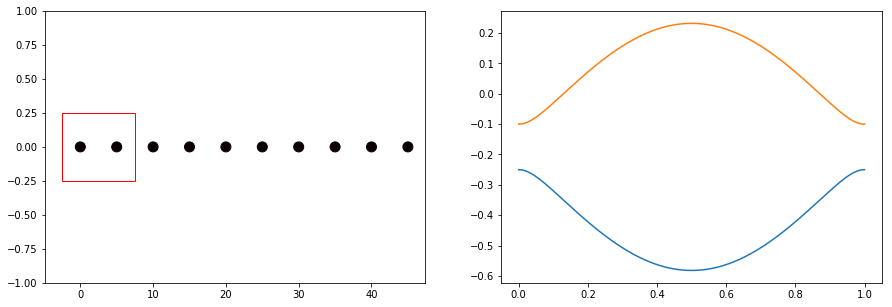

In [6]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
visulize(axs[0],h,t)
axs[1].plot(kpts,E)